# Introduction

Ce rapport vise à analyser les données de la saison 2018-2019 de la Premier League pour déceler des tendances et facteurs clés influençant les performances des équipes et des joueurs. L'objectif est double : approfondir mes compétences en analyse de données et fournir des insights utiles sur les dynamiques de l'une des ligues de football les plus compétitives au monde. À travers une démarche méthodique comprenant la collecte, le nettoyage, l'analyse exploratoire, et la modélisation des données, ce travail espère offrir une compréhension enrichie des éléments déterminants du succès dans la Premier League. Les résultats visent non seulement à éclairer les passionnés et professionnels du football mais aussi à affiner mes propres techniques d'analyse.

Le dataset que nous allons analyser recense tous les matchs de cette saison. Nous allons suivre les axes d'analyses suivants : 
- Analyse de performance globale à domicile vs extérieur des équipes
- Impact des fautes et de l'arbitrage sur le résultat
- Efficacité offensive des équipes

# Dictionnaire des Données


| Colonne  | Explication                                            |
|----------|--------------------------------------------------------|
| Div      | Division dans laquelle le match a été joué             |
| Date     | Date à laquelle le match a été joué                    |
| HomeTeam | L'équipe à domicile                                    |
| AwayTeam | L'équipe à l'extérieur                                 |
| FTHG     | Buts à domicile à temps plein                          |
| FTAG     | Buts à l'extérieur à temps plein                       |
| FTR      | Résultat à temps plein                                 |
| HTHG     | Buts à domicile à la mi-temps                          |
| HTAG     | Buts à l'extérieur à la mi-temps                       |
| HTR      | Résultat à la mi-temps                                 |
| Arbitre  | L'arbitre du match                                     |
| HS       | Nombre de tirs effectués par l'équipe à domicile       |
| AS       | Nombre de tirs effectués par l'équipe à l'extérieur    |
| HST      | Nombre de tirs cadrés par l'équipe à domicile          |
| AST      | Nombre de tirs cadrés par l'équipe à l'extérieur       |
| HF       | Nombre de fautes commises par l'équipe à domicile      |
| AF       | Nombre de fautes commises par l'équipe à l'extérieur   |
| HC       | Nombre de corners obtenus par l'équipe à domicile      |
| AC       | Nombre de corners obtenus par l'équipe à l'extérieur   |
| HY       | Nombre de cartons jaunes reçus par l'équipe à domicile |
| AY       | Nombre de cartons jaunes reçus par l'équipe à l'extérieur |
| HR       | Nombre de cartons rouges reçus par l'équipe à domicile |
| AR       | Nombre de cartons rouges reçus par l'équipe à l'extérieur |


### Importation des données

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('soccer18-19.csv')

#On affiche la shape du dataframe (nb de lignes x nb de colonnes)
print("Nombres de lignes et de colonnes:", df.shape)

#On affiche les cinq premières lignes de la table pour avoir un aperçu de la table
df.head()


Nombres de lignes et de colonnes: (380, 23)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0


# Affichage et description des données

In [ ]:
#On affiche les informations générales de la base de données pour vérifier son importation
df.info() 

#On affiche un résumé statistique des données
df.describe()

# Nettoyage des données


Nous allons vérifier si des données sont manquantes.

In [54]:
df.isna().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

Aucune donnée n'est manquante, je n'ai donc pas besoin d'altérer ou modifier le code pour le rendre utilisable. 

# Analyse de performance globale

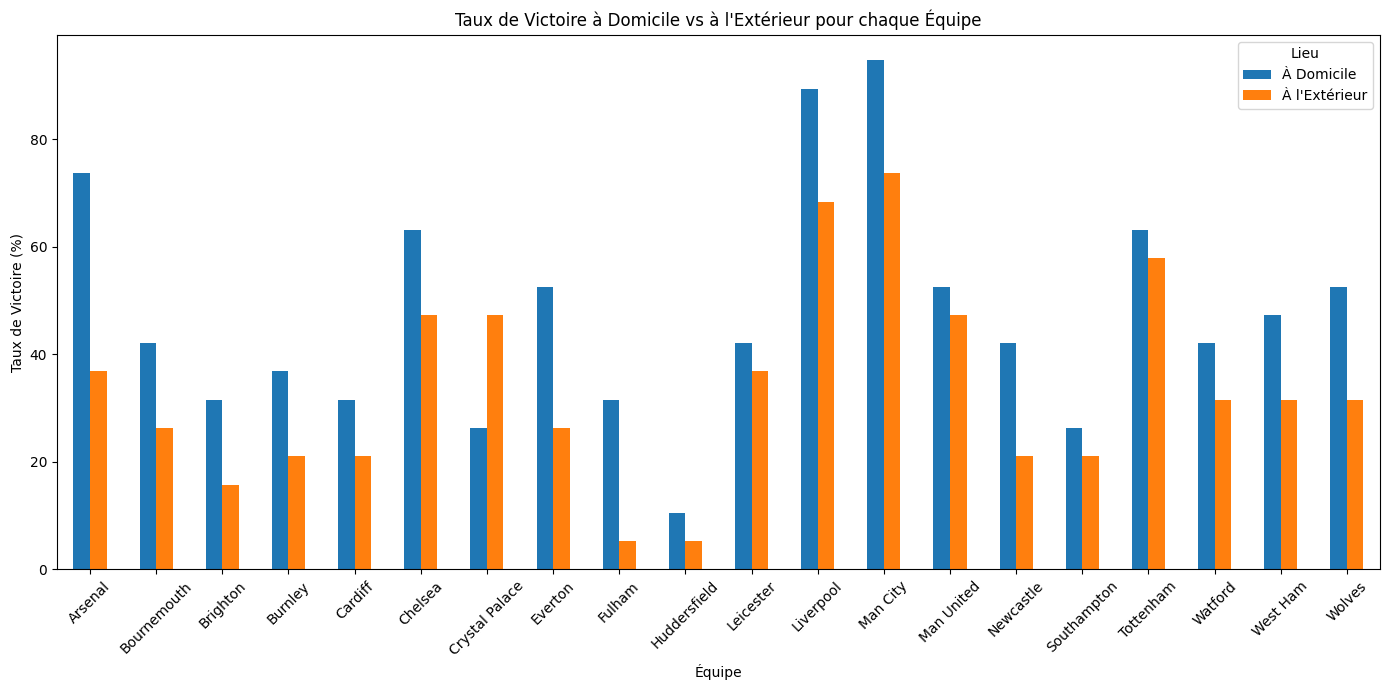

In [30]:

# Calcul du nombre de victoires à domicile et à l'extérieur
victoires_domicile = df[df['FTR'] == 'H'].groupby('HomeTeam')['FTR'].count()
victoires_exterieur = df[df['FTR'] == 'A'].groupby('AwayTeam')['FTR'].count()

# Calcul du nombre total de matchs joués à domicile et à l'extérieur
total_domicile = df.groupby('HomeTeam')['FTR'].count()
total_exterieur = df.groupby('AwayTeam')['FTR'].count()

# Calcul du taux de victoire
taux_victoire_domicile = (victoires_domicile / total_domicile) * 100
taux_victoire_exterieur = (victoires_exterieur / total_exterieur) * 100

# Création d'un DataFrame pour la visualisation
taux_victoire = pd.DataFrame({
    'À Domicile': taux_victoire_domicile,
    'À l\'Extérieur': taux_victoire_exterieur
})

# Graphique
taux_victoire.plot(kind='bar', figsize=(14, 7))
plt.title('Taux de Victoire à Domicile vs à l\'Extérieur pour chaque Équipe')
plt.ylabel('Taux de Victoire (%)')
plt.xlabel('Équipe')
plt.xticks(rotation=45)
plt.legend(title='Lieu')
plt.tight_layout()

# Affichage du graphique
plt.show()


- On remarque visuellement que les équipes gagnent en moyenne plus à domicile qu'à l'extérieur (à l'exception de Crystal Palace)
- Arsenal possède la plus grande différence de taux de victoires : cette équipe performe mal à l'extérieur. 

Analysons les statistiques au coeur du jeu pour expliquer cette différence : 

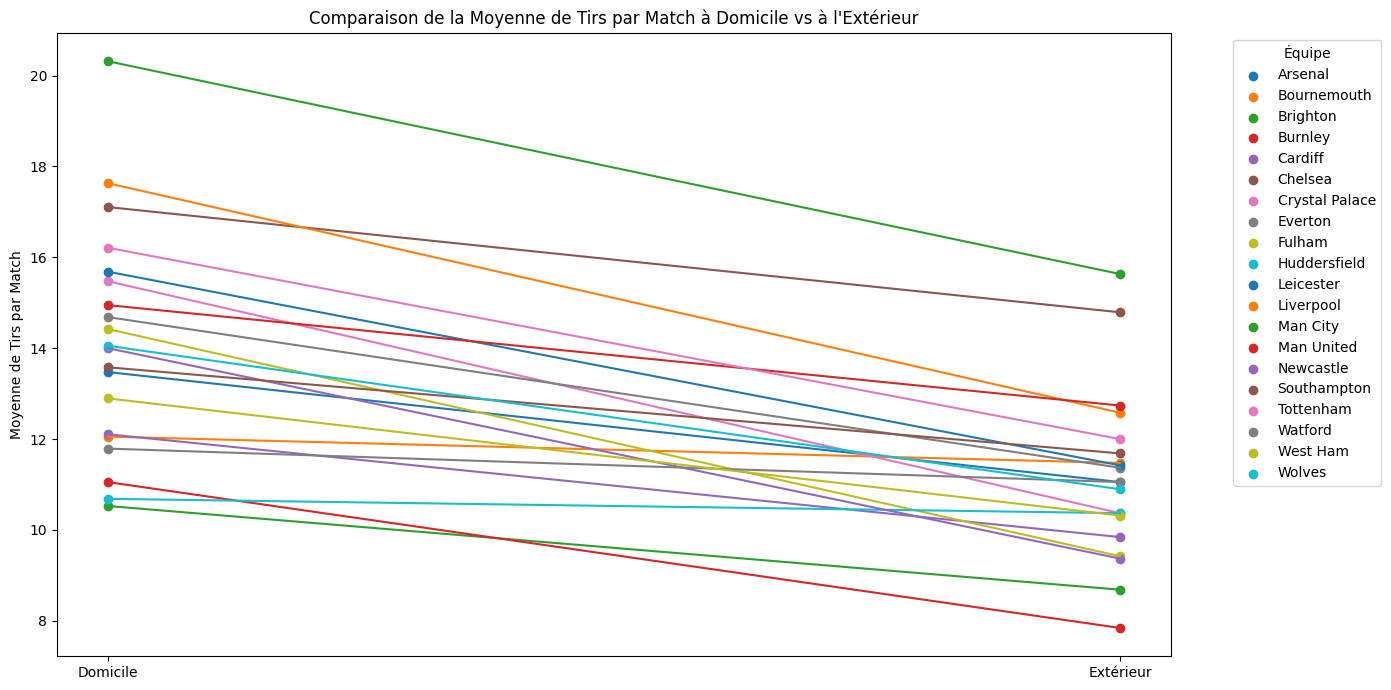

In [47]:

# Total des tirs à domicile par équipe
total_tirs_domicile = df.groupby('HomeTeam')['HS'].sum()

# Nombre de matchs joués à domicile par équipe
nombre_matchs_domicile = df.groupby('HomeTeam')['HS'].count()

# Calcul de la moyenne des tirs par match à domicile
moyenne_tirs_domicile = total_tirs_domicile / nombre_matchs_domicile


# Calculs pour les tirs à l'extérieur
total_tirs_exterieur = df.groupby('AwayTeam')['AS'].sum()
nombre_matchs_exterieur = df.groupby('AwayTeam')['AS'].count()
moyenne_tirs_exterieur = total_tirs_exterieur / nombre_matchs_exterieur

# Combinaison des moyennes à domicile et à l'extérieur dans un DataFrame
moyenne_tirs_par_match['Moyenne de Tirs à l\'Extérieur par Match'] = moyenne_tirs_exterieur

# Préparation des données pour le graphique
equipes = moyenne_tirs_par_match.index
tirs_domicile = moyenne_tirs_par_match['Moyenne de Tirs à Domicile par Match']
tirs_exterieur = moyenne_tirs_par_match['Moyenne de Tirs à l\'Extérieur par Match']

# Création du graphique
plt.figure(figsize=(14, 7))

# Pour chaque équipe, tracer un point pour les tirs à domicile et à l'extérieur, et les connecter
for i, equipe in enumerate(equipes):
    plt.scatter(['Domicile', 'Extérieur'], [tirs_domicile.iloc[i], tirs_exterieur.iloc[i]], label=equipe)
    plt.plot(['Domicile', 'Extérieur'], [tirs_domicile.iloc[i], tirs_exterieur.iloc[i]])

plt.title('Comparaison de la Moyenne de Tirs par Match à Domicile vs à l\'Extérieur')
plt.ylabel('Moyenne de Tirs par Match')
plt.legend(title='Équipe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Assure que tout est bien ajusté dans le graphique
plt.show()


- L'équipe tirent plus en moyenne à domicile qu'à l'extérieur.
- Elles sont donc plus offensives dans le jeu.

On doit maintenant prouver que les équipes qui tirent le plus gagnent plus en moyenne. 

In [48]:
# Calcul du nombre total de tirs pour chaque équipe
tirs_domicile = df.groupby('HomeTeam')['HS'].sum()
tirs_exterieur = df.groupby('AwayTeam')['AS'].sum()
total_tirs = tirs_domicile.add(tirs_exterieur, fill_value=0)

# Calcul du nombre total de victoires pour chaque équipe
victoires_domicile = df[df['FTR'] == 'H'].groupby('HomeTeam')['FTR'].count()
victoires_exterieur = df[df['FTR'] == 'A'].groupby('AwayTeam')['FTR'].count()
total_victoires = victoires_domicile.add(victoires_exterieur, fill_value=0)

# Combinaison des tirs et des victoires dans un DataFrame
stats_generales = pd.DataFrame({
    'Total Tirs': total_tirs,
    'Total Victoires': total_victoires
}).fillna(0)

# Calcul du nombre total de matchs joués pour chaque équipe pour la normalisation
total_matchs_domicile = df.groupby('HomeTeam')['FTR'].count()
total_matchs_exterieur = df.groupby('AwayTeam')['FTR'].count()
total_matchs = total_matchs_domicile.add(total_matchs_exterieur, fill_value=0)

# Normalisation des tirs et des victoires par le nombre de matchs joués
stats_generales['Tirs par Match'] = stats_generales['Total Tirs'] / total_matchs
stats_generales['Victoires par Match'] = stats_generales['Total Victoires'] / total_matchs


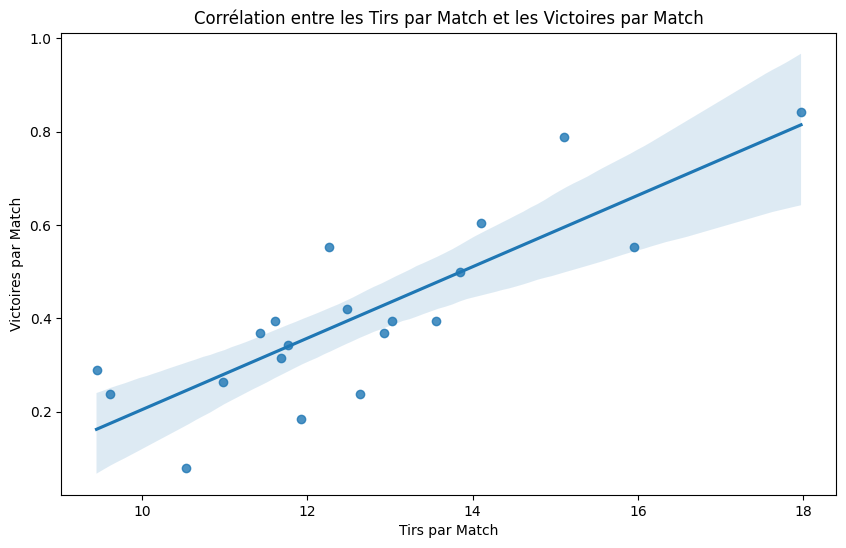

In [51]:
# Visualisation de la corrélation
plt.figure(figsize=(10, 6))
sns.regplot(x='Tirs par Match', y='Victoires par Match', data=stats_generales, marker='o')

plt.title('Corrélation entre les Tirs par Match et les Victoires par Match')
plt.xlabel('Tirs par Match')
plt.ylabel('Victoires par Match')

plt.show()

In [53]:
correlation = stats_generales[['Tirs par Match', 'Victoires par Match']].corr()
print(correlation)

                     Tirs par Match  Victoires par Match
Tirs par Match             1.000000             0.831884
Victoires par Match        0.831884             1.000000


On visualise une correlation positive forte. Ainsi, une équipe aggressive offensivement gagne en moyenne plus souvent leurs matchs 

# Impact des fautes et arbitrage

Nous allons commencer par vérifier s'il existe un lien entre le nombres de fautes par match et le % de victoires des équipes.

In [55]:
# Calcul du nombre total de fautes pour chaque équipe
fautes_domicile = df.groupby('HomeTeam')['HF'].sum()
fautes_exterieur = df.groupby('AwayTeam')['AF'].sum()
total_fautes = fautes_domicile.add(fautes_exterieur, fill_value=0)

# Calcul du nombre moyen de fautes par match pour chaque équipe
moyenne_fautes_par_match = total_fautes / total_matchs


# Création d'un DataFrame pour la visualisation des données
stats_fautes_victoires = pd.DataFrame({
    'Moyenne Fautes par Match': moyenne_fautes_par_match,
    'Pourcentage Victoire par Match': stats_generales['Victoires par Match'] * 100  # Assurez-vous que cela correspond à votre DataFrame précédent
})


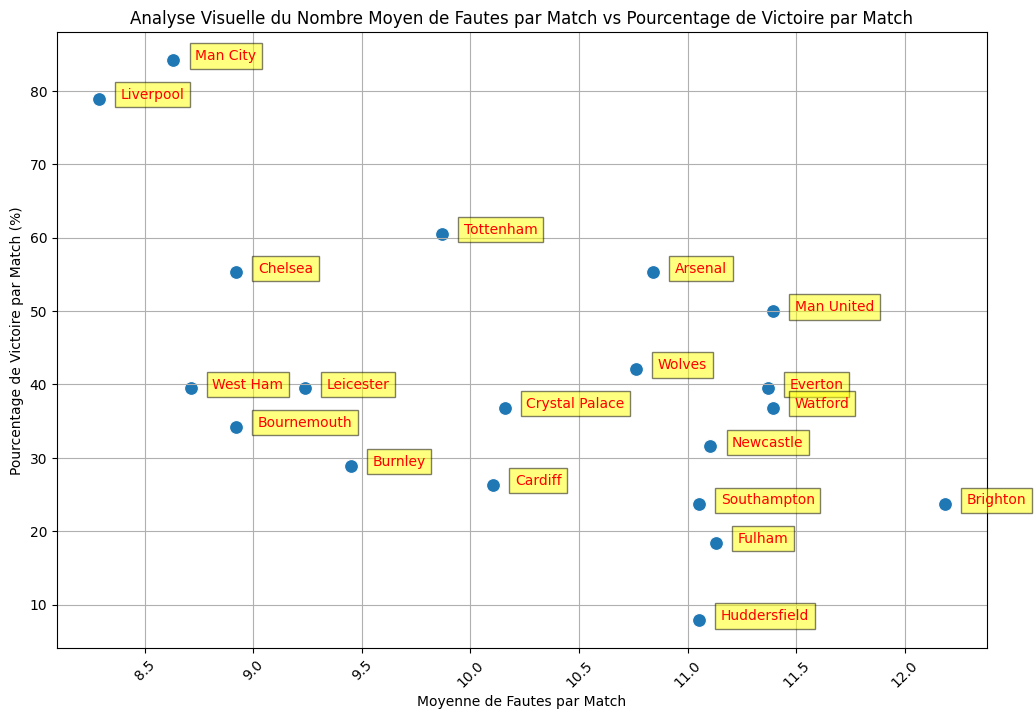

In [59]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=stats_fautes_victoires, x='Moyenne Fautes par Match', y='Pourcentage Victoire par Match', s=100)

# Ajout d'étiquettes pour clarifier le graphique, en utilisant .iloc pour éviter les avertissements
for i in range(stats_fautes_victoires.shape[0]):
    plt.text(x=stats_fautes_victoires['Moyenne Fautes par Match'].iloc[i]+0.1,  # Utilisation de .iloc
             y=stats_fautes_victoires['Pourcentage Victoire par Match'].iloc[i],  # Utilisation de .iloc
             s=stats_fautes_victoires.index[i],  # Nom de l'équipe
             fontdict=dict(color='red',size=10),
             bbox=dict(facecolor='yellow',alpha=0.5))

plt.title('Analyse Visuelle du Nombre Moyen de Fautes par Match vs Pourcentage de Victoire par Match')
plt.xlabel('Moyenne de Fautes par Match')
plt.ylabel('Pourcentage de Victoire par Match (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [57]:
correlation_fautes_victoires = stats_fautes_victoires.corr()
print(correlation_fautes_victoires)


                                Moyenne Fautes par Match  \
Moyenne Fautes par Match                        1.000000   
Pourcentage Victoire par Match                 -0.562196   

                                Pourcentage Victoire par Match  
Moyenne Fautes par Match                             -0.562196  
Pourcentage Victoire par Match                        1.000000  


On remarque un coefficient de correlation négativement fort. Il n'y a donc pas réellement de lien entre le nombres de fautes et le % de victoires. 
On va donc passer directement aux cartons jaunes et rouges. 

In [61]:
# Identification des matchs où l'équipe à domicile a reçu au moins un carton rouge et a perdu
defaites_rouge_domicile = df[(df['HR'] > 0) & (df['FTR'] == 'A')]

# Identification des matchs où l'équipe à l'extérieur a reçu au moins un carton rouge et a perdu
defaites_rouge_exterieur = df[(df['AR'] > 0) & (df['FTR'] == 'H')]

# Calcul du nombre total de défaites avec au moins un carton rouge
total_defaites_rouge = len(defaites_rouge_domicile) + len(defaites_rouge_exterieur)

# Calcul du nombre total de matchs avec au moins un carton rouge
total_matchs_rouge_domicile = df[df['HR'] > 0]
total_matchs_rouge_exterieur = df[df['AR'] > 0]
total_matchs_rouge = len(total_matchs_rouge_domicile) + len(total_matchs_rouge_exterieur)

# Calcul du pourcentage de défaites lorsqu'un carton rouge est reçu
if total_matchs_rouge > 0:
    pourcentage_defaites_rouge = (total_defaites_rouge / total_matchs_rouge) * 100
else:
    pourcentage_defaites_rouge = 0

print(f"Pourcentage de défaites lorsqu'une équipe reçoit au moins un carton rouge : {pourcentage_defaites_rouge:.2f}%")


Pourcentage de défaites lorsqu'une équipe reçoit au moins un carton rouge : 56.52%


L'analyse des données de matchs a permis d'examiner l'impact des cartons rouges sur les performances des équipes. Nous avons découvert que dans 56% des cas où une équipe reçoit au moins un carton rouge, elle finit par perdre le match. Ce constat souligne l'importance cruciale de la discipline sur le terrain, étant donné qu'un carton rouge non seulement réduit le nombre de joueurs disponibles, affectant ainsi la stratégie et la dynamique de l'équipe, mais peut également avoir un impact négatif sur le moral des joueurs.

Cette statistique révèle que les équipes doivent non seulement se concentrer sur l'amélioration technique et tactique mais aussi sur la gestion de leur comportement en match pour minimiser les risques de réductions numériques. De plus, étant donné l'impact significatif d'un carton rouge sur l'issue des matchs, il serait judicieux pour les équipes d'intégrer dans leur entraînement des stratégies spécifiques pour jouer en infériorité numérique, afin de mieux s'adapter et rester compétitives même lorsqu'elles sont confrontées à cette situation difficile.

Cette analyse offre un aperçu précieux de la relation entre la discipline sur le terrain et le succès des équipes, soulignant que la prévention des comportements pouvant mener à des expulsions est essentielle pour maximiser les chances de victoire. Elle ouvre également la voie à des études plus approfondies sur l'impact des différentes fautes et sanctions (telles que les cartons jaunes) et sur la manière dont les équipes ajustent leurs tactiques en réponse à ces événements.